# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import pandas_profiling
%matplotlib inline

import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

# Loading Data


In [2]:
# Path to the dataset
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tabular-playground-series-jan-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-jan-2021/train.csv
/kaggle/input/tabular-playground-series-jan-2021/test.csv


In [3]:
%%time
train = pd.read_csv('/kaggle/input/tabular-playground-series-jan-2021/train.csv')
test = pd.read_csv('/kaggle/input/tabular-playground-series-jan-2021/test.csv')
sample_sub = pd.read_csv('/kaggle/input/tabular-playground-series-jan-2021/sample_submission.csv')
org_len = len(train.drop('id',axis=1))

CPU times: user 1.87 s, sys: 178 ms, total: 2.05 s
Wall time: 3.89 s


# Understanding Data

In [4]:
train.head()

id     cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
0   1  0.670390  0.811300  0.643968  0.291791  0.284117  0.855953  0.890700   
1   3  0.388053  0.621104  0.686102  0.501149  0.643790  0.449805  0.510824   
2   4  0.834950  0.227436  0.301584  0.293408  0.606839  0.829175  0.506143   
3   5  0.820708  0.160155  0.546887  0.726104  0.282444  0.785108  0.752758   
4   8  0.935278  0.421235  0.303801  0.880214  0.665610  0.830131  0.487113   

      cont8     cont9    cont10    cont11    cont12    cont13    cont14  \
0  0.285542  0.558245  0.779418  0.921832  0.866772  0.878733  0.305411   
1  0.580748  0.418335  0.432632  0.439872  0.434971  0.369957  0.369484   
2  0.558771  0.587603  0.823312  0.567007  0.677708  0.882938  0.303047   
3  0.823267  0.574466  0.580843  0.769594  0.818143  0.914281  0.279528   
4  0.604157  0.874658  0.863427  0.983575  0.900464  0.935918  0.435772   

     target  
0  7.243043  
1  8.203331  
2  7.776091  
3  6.957716  
4  7.951046

In [5]:
test.head()

id     cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
0   0  0.353600  0.738780  0.600939  0.293377  0.285691  0.458006  0.620704   
1   2  0.907222  0.189756  0.215531  0.869915  0.301333  0.528958  0.390351   
2   6  0.179287  0.355353  0.623972  0.437812  0.282476  0.320826  0.386789   
3   7  0.359385  0.181049  0.551368  0.206386  0.280763  0.482076  0.506677   
4  10  0.335791  0.682607  0.676481  0.219465  0.282861  0.581721  0.748639   

      cont8     cont9    cont10    cont11    cont12    cont13    cont14  
0  0.422249  0.369203  0.435727  0.550540  0.699134  0.286864  0.364515  
1  0.521112  0.794779  0.798580  0.446475  0.449037  0.916964  0.513002  
2  0.776422  0.222268  0.229102  0.211913  0.222651  0.327164  0.827941  
3  0.362793  0.379737  0.345686  0.445276  0.518485  0.299028  0.598166  
4  0.350158  0.448915  0.506878  0.817721  0.805895  0.790591  0.249275

In [6]:
print("Train data set dtypes: \n")
print(f"Shape : {train.shape}")
print(f"{train.dtypes.value_counts()}")

print('*'*30)

print("Test data set dtypes: \n")
print(f"Shape : {test.shape}")
print(f"{test.dtypes.value_counts()}")

Train data set dtypes: 

Shape : (300000, 16)
float64    15
int64       1
dtype: int64
******************************
Test data set dtypes: 

Shape : (200000, 15)
float64    14
int64       1
dtype: int64


In [7]:
# Gives a details on Count number of non-NA/null observations, Maximum and Minimum of the values in the object, Mean and Standard Deviation of the Values
train.describe()

id          cont1          cont2          cont3  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean   249825.145857       0.506873       0.497898       0.521557   
std    144476.732562       0.203976       0.228159       0.200770   
min         1.000000      -0.082263      -0.031397       0.020967   
25%    124656.500000       0.343078       0.319170       0.344096   
50%    249738.500000       0.484005       0.553209       0.551471   
75%    374836.250000       0.643789       0.731263       0.648315   
max    499999.000000       1.016227       0.859697       1.006955   

               cont4          cont5          cont6          cont7  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean        0.515683       0.502022       0.526515       0.487890   
std         0.233035       0.220701       0.217909       0.181096   
min         0.152761       0.276377       0.066166      -0.097666   
25%         0.294935       0.284108       0.356163       0.346600   
50%         0.482880       0.451733       0.470988       0.466825   
75%         0.748705       0.670660       0.694043       0.581292   
max         1.010402       1.034261       1.043858       1.066167   

               cont8          cont9         cont10         cont11  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean        0.525163       0.459857       0.520532       0.483926   
std         0.216221       0.196685       0.201854       0.220082   
min         0.217260      -0.240604      -0.085046       0.083277   
25%         0.341486       0.330832       0.375465       0.300474   
50%         0.483460       0.416843       0.458877       0.441916   
75%         0.685250       0.575041       0.700292       0.679128   
max         1.024427       1.004114       1.199951       1.022620   

              cont12         cont13         cont14         target  
count  300000.000000  300000.000000  300000.000000  300000.000000  
mean        0.506877       0.553442       0.503713       7.905661  
std         0.218947       0.229730       0.208238       0.733071  
min         0.088635       0.029950       0.166367       0.000000  
25%         0.310166       0.350472       0.308673       7.329367  
50%         0.486599       0.487707       0.431845       7.940571  
75%         0.694453       0.768479       0.712653       8.470084  
max         1.049025       0.977845       0.868506      10.267569

### No Missing Values
**As we can see above the count of no_null values are equal to the len of columns (300000)**

# Pandas Profiling 🐼 
**pandas_profiling extends the pandas DataFrame for quick data analysis.**

In [8]:
profile = pandas_profiling.ProfileReport(train,minimal=True)
profile.to_file(output_file="output.html")
profile

# Univariate Analysis
**We will usually use Distribution plot to visualize their data distribution for continuous Values**

In [9]:
train_cont = train.drop('id',axis=1)

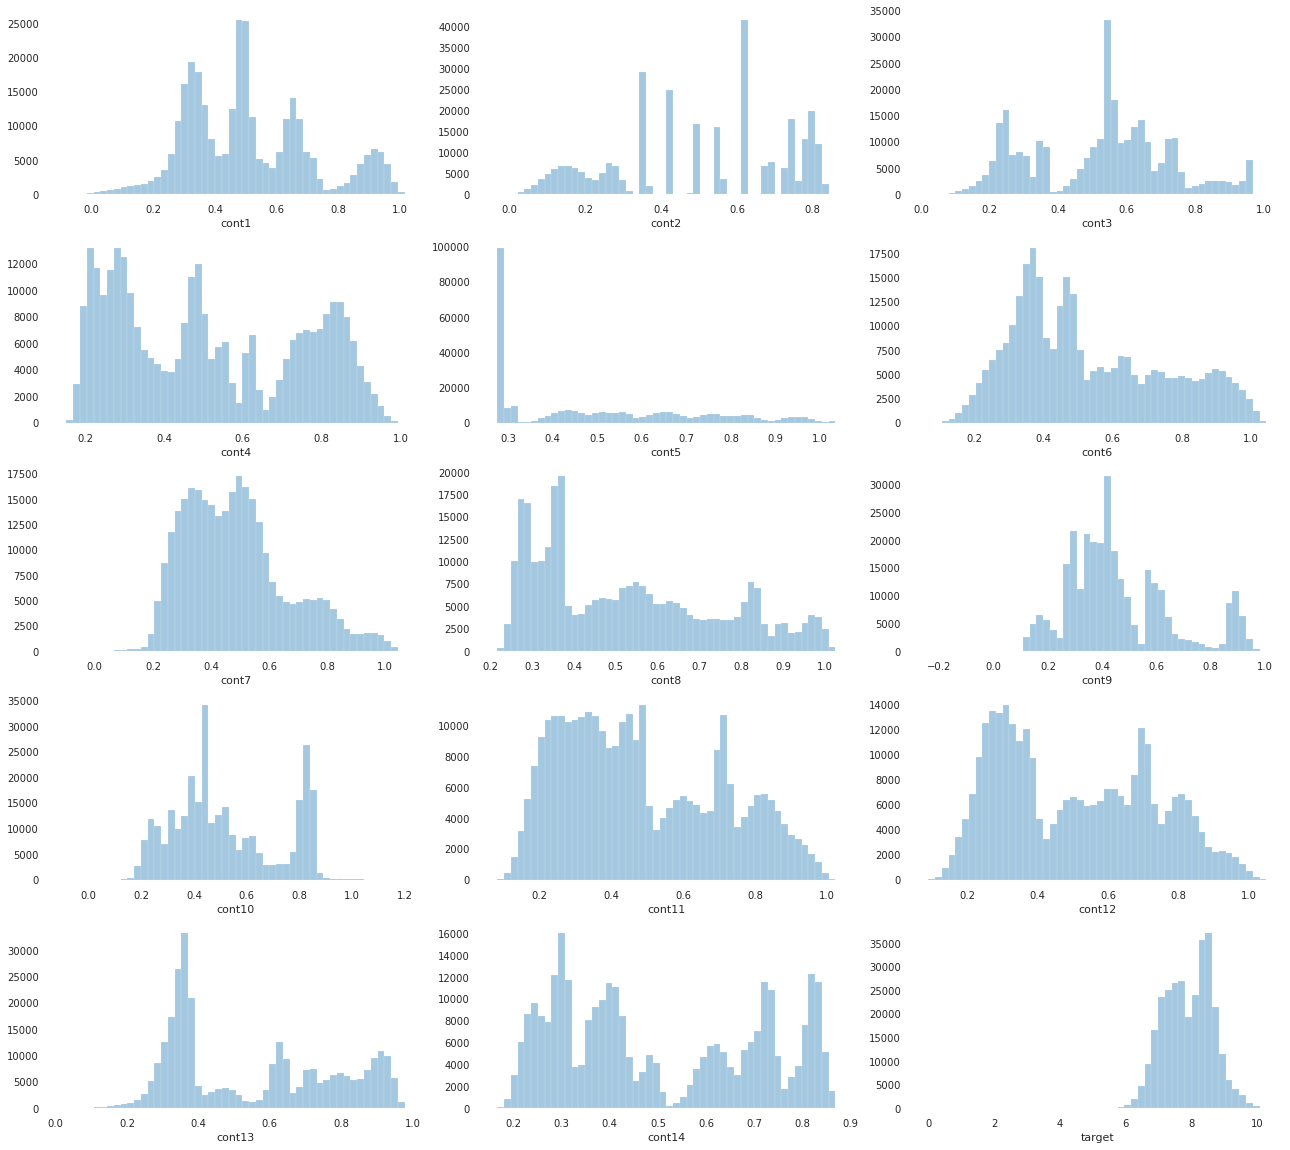

In [10]:
fig = plt.figure(figsize=(18,16))

for index,col in enumerate(train_cont):
    plt.subplot(5,3,index+1)
    sns.distplot(train_cont.loc[:,col], kde=False)
fig.tight_layout(pad=1.0)

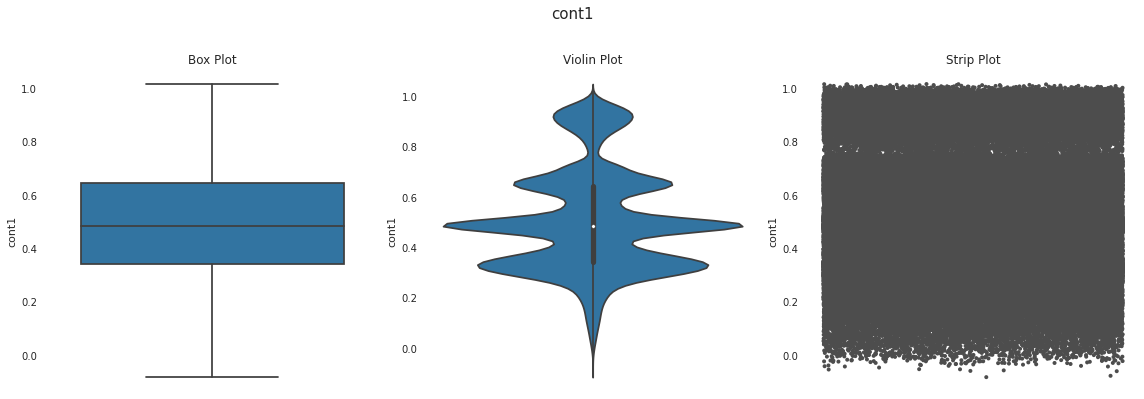

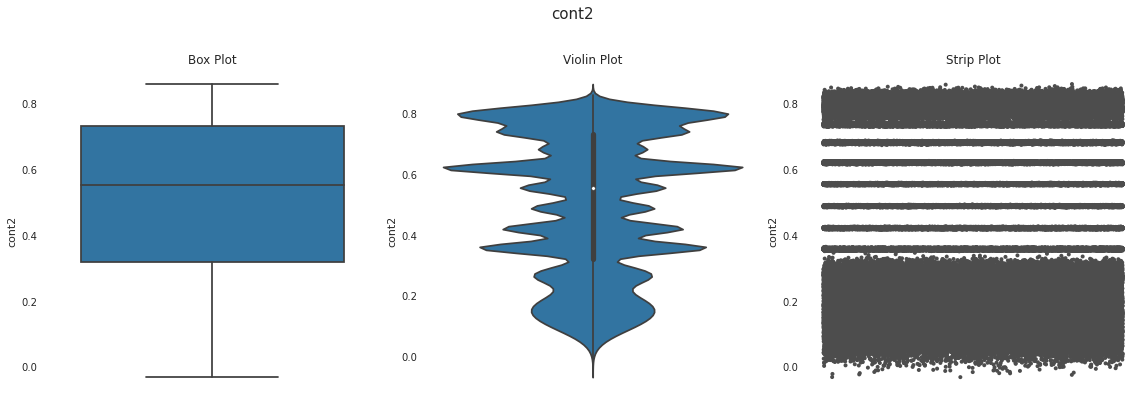

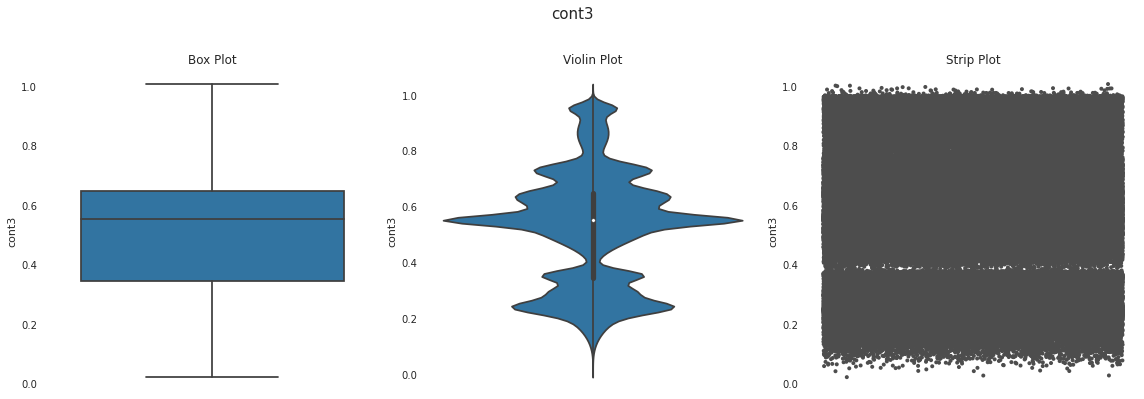

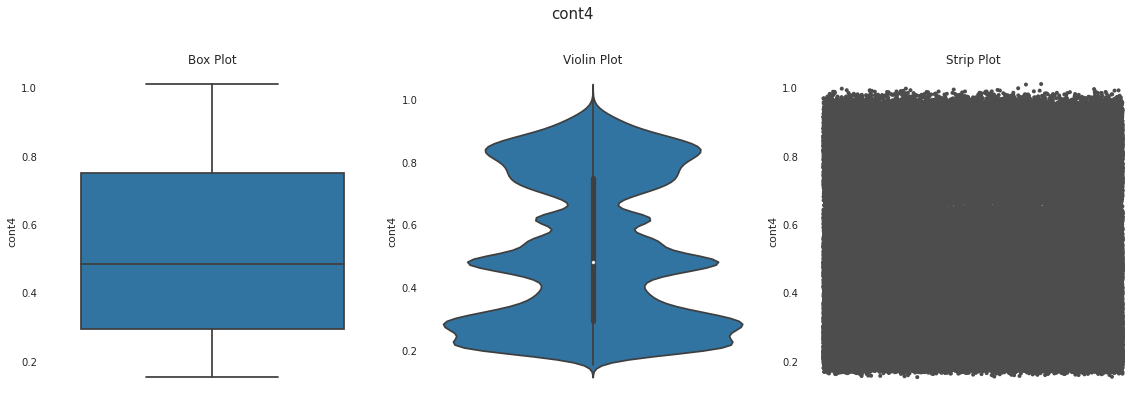

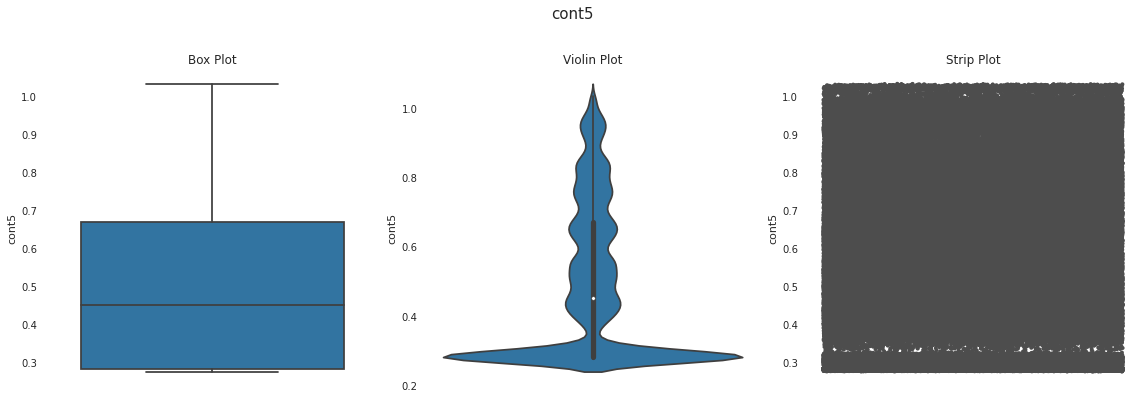

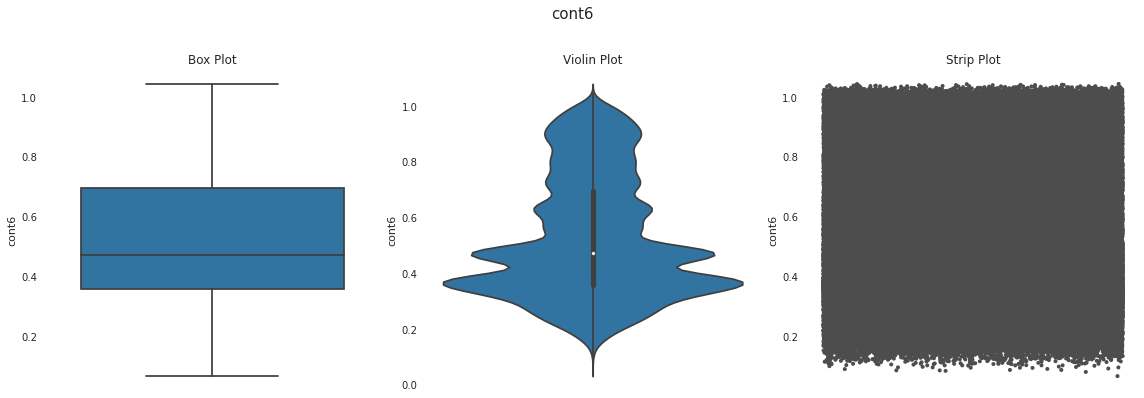

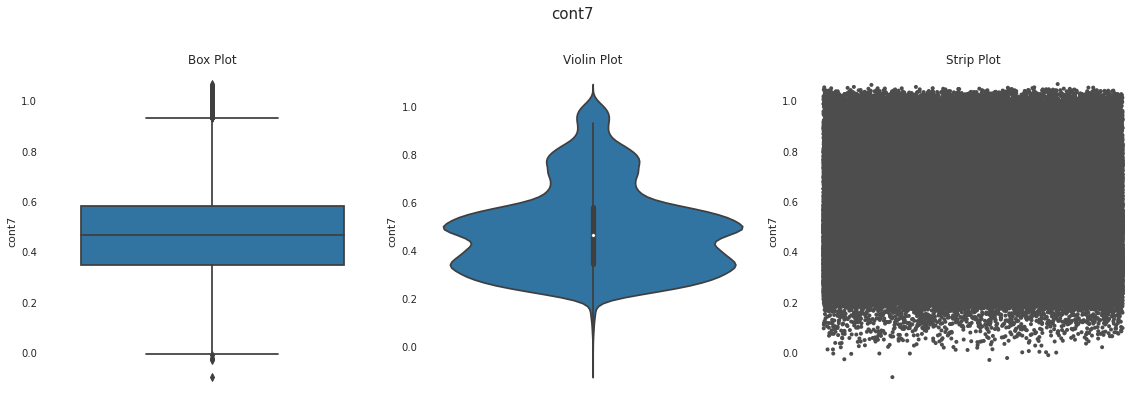

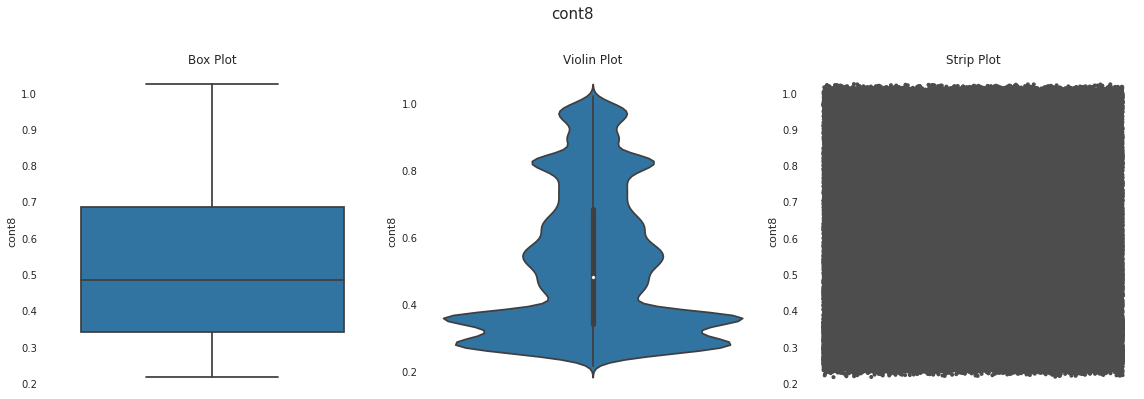

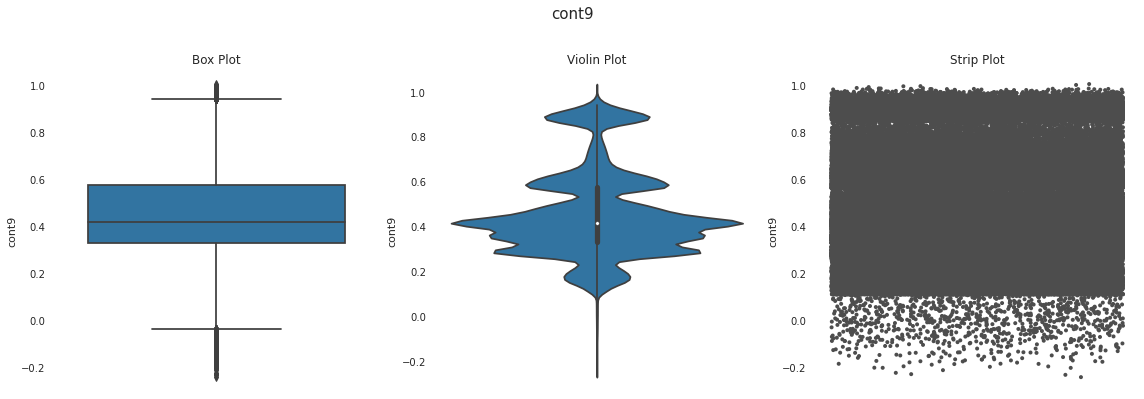

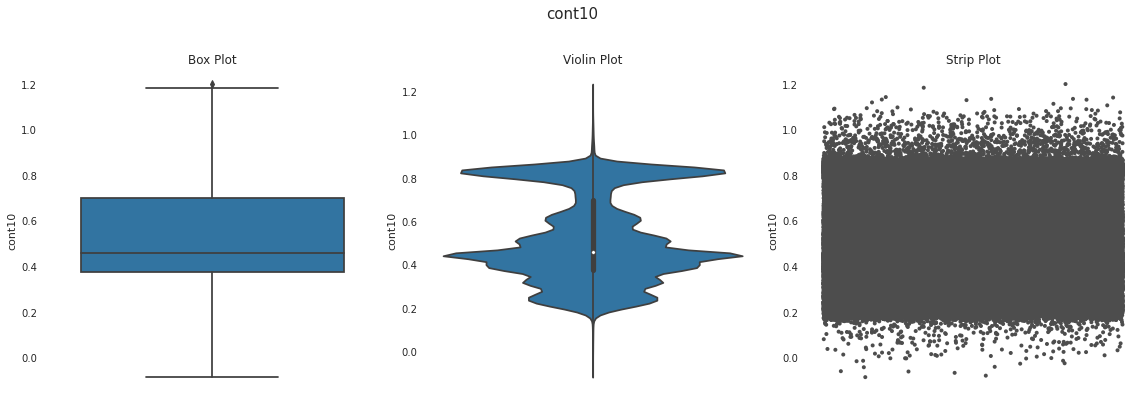

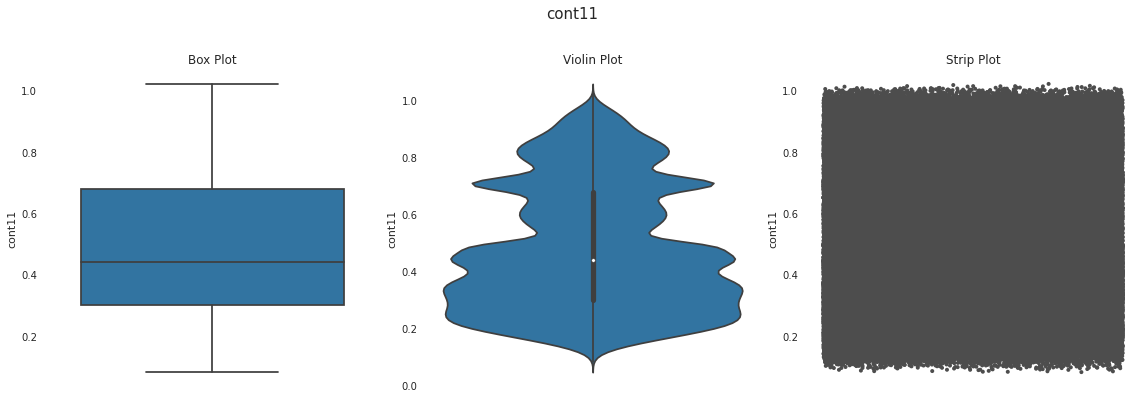

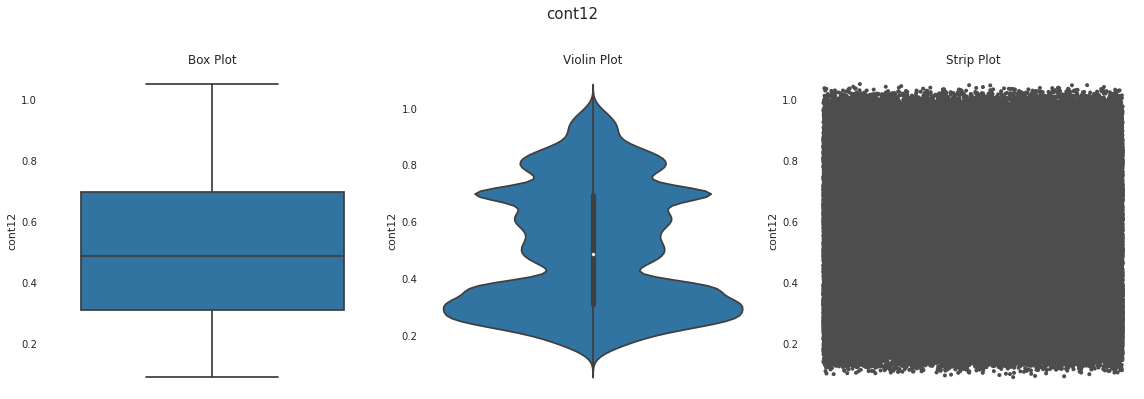

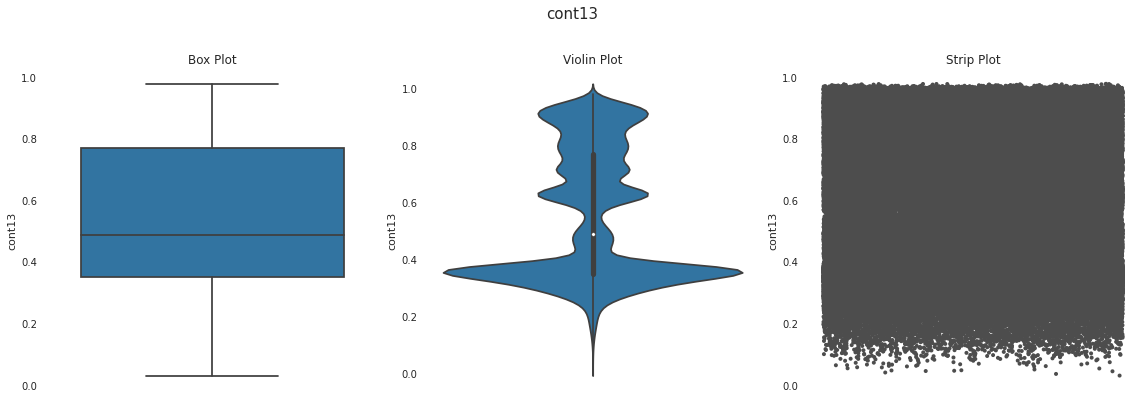

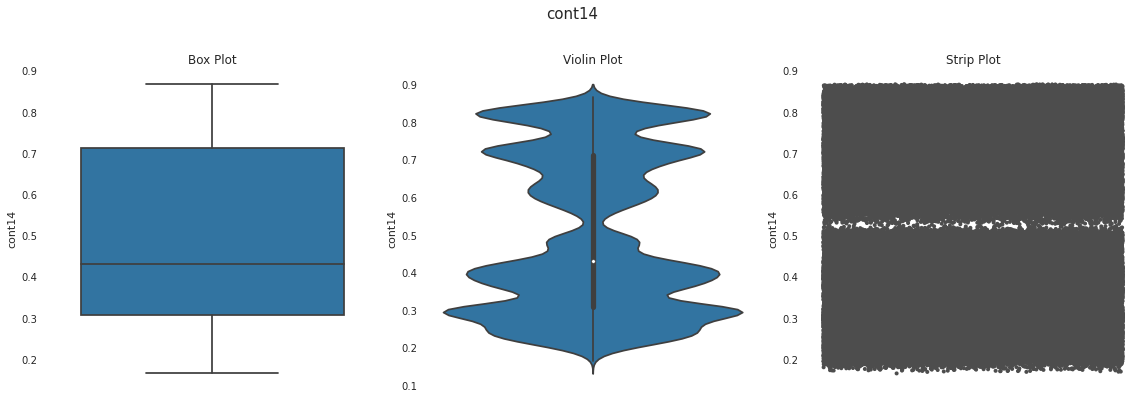

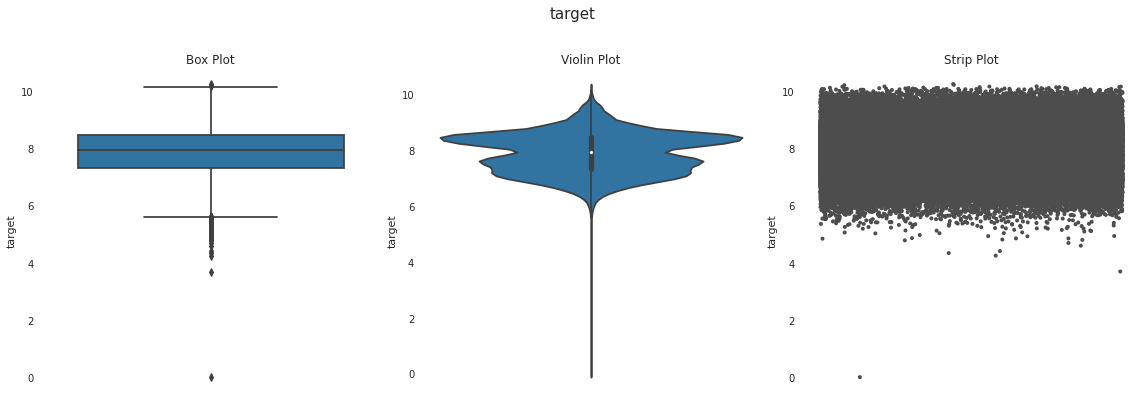

In [11]:
    for c in train_cont.columns:
        fig, axs = plt.subplots(1, 3, figsize=(16, 5))
        sns.boxplot(y=c, data=train_cont, ax=axs[0]) # 1

        sns.violinplot(y=c, data=train_cont, ax=axs[1]) # 2

        sns.stripplot(y=c, data=train_cont, size=4, color=".3", linewidth=0, ax=axs[2]) # 3


        fig.suptitle(c, fontsize=15, y=1.1)
        axs[0].set_title('Box Plot')
        axs[1].set_title('Violin Plot')
        axs[2].set_title('Strip Plot')

        plt.tight_layout()
        plt.show()

**Few Outliers in target, cont10, cont9, cont7** <br>
**Cont2 have some regular interval gaps**<br>
**Cont5 is dominated with lesser value**

# Bi-variate Analysis

Scatterplot with the target

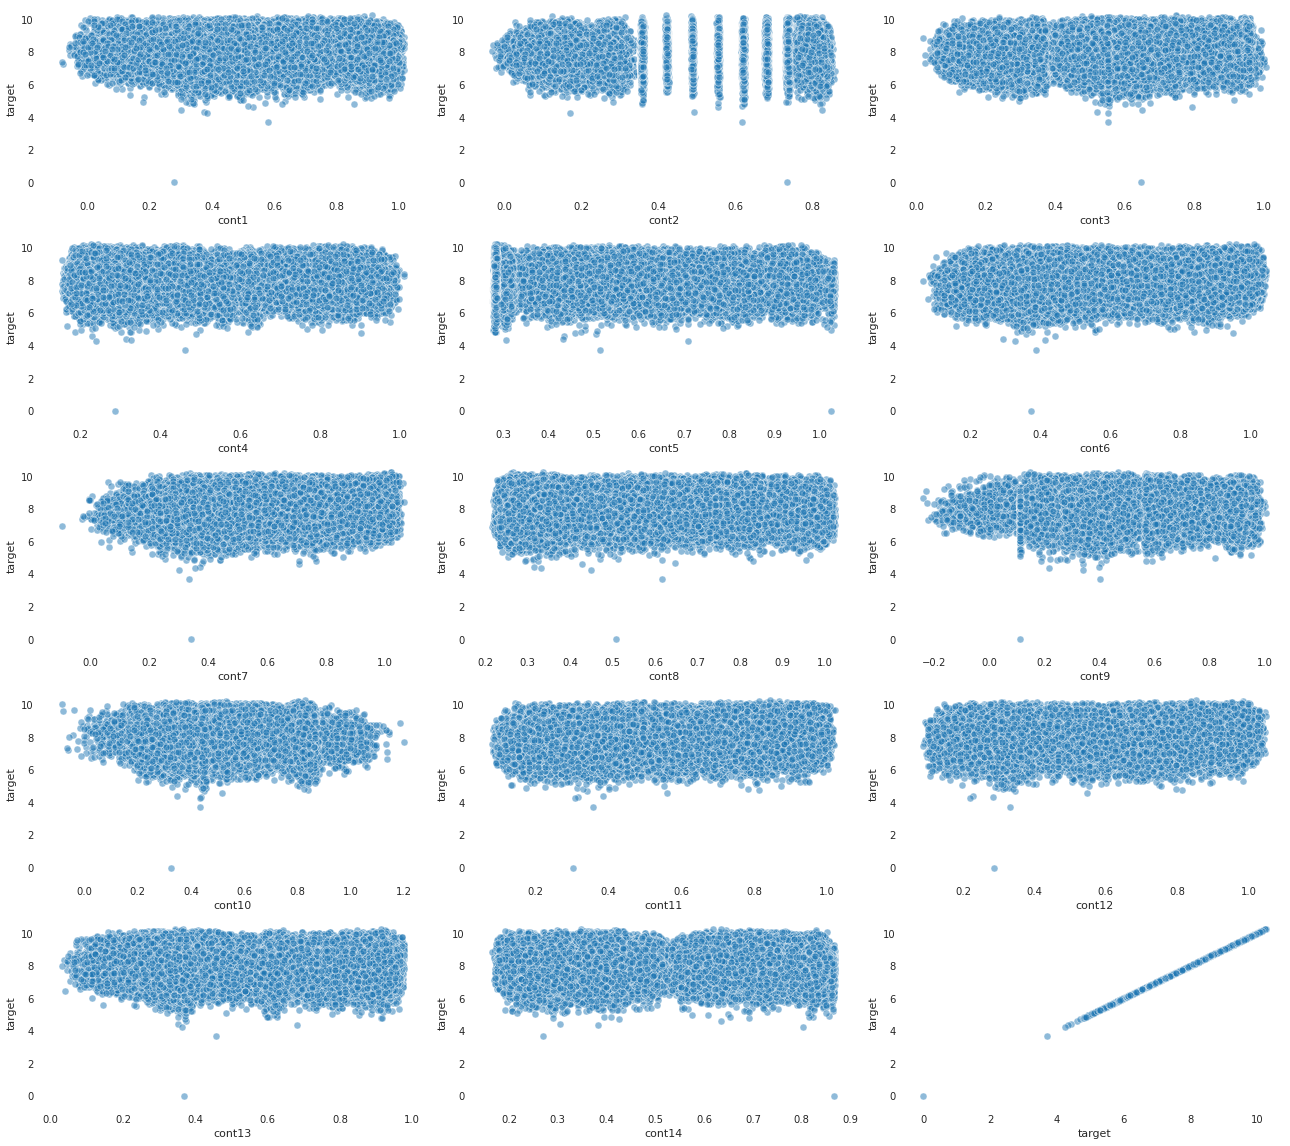

In [12]:
fig = plt.figure(figsize=(18,16))
train_cont = train.drop('id',axis=1)
for index,col in enumerate(train_cont):
    plt.subplot(5,3,index+1)
    sns.scatterplot(x=train_cont.iloc[:,index], y=train['target'],alpha=0.5)
fig.tight_layout(pad=1.0)

Heatmap

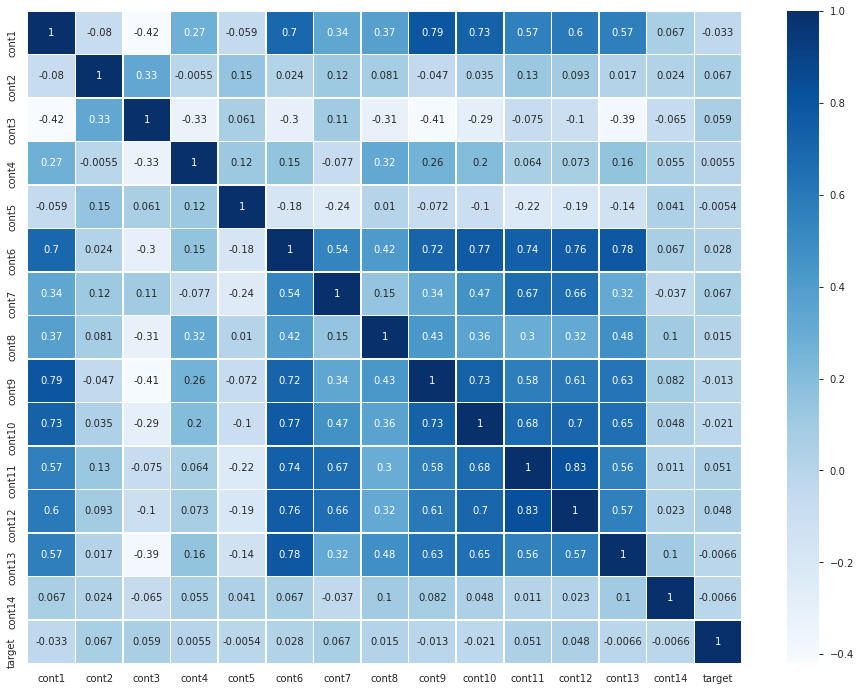

In [13]:
plt.figure(figsize=(16,12))
corr = train_cont.corr()
sns.heatmap(corr,cmap='Blues',linewidth=0.5,annot=True)

No good correlation with target column 👀

# Data Processing 

### **Feature Engineering**

**Tried some randomn combinations**

In [14]:
train_cont['new'] = train_cont['cont2']*train_cont['cont3']*train_cont['cont6']*train_cont['cont7']*train_cont['cont11']*train_cont['cont12']
test['new'] = test['cont2']*test['cont3']*test['cont6']*test['cont7']*test['cont11']*test['cont12']

In [15]:
train_cont['new1'] = train_cont['cont9']*train_cont['cont10']*train_cont['cont1']
test['new1'] = test['cont9']*test['cont10']*test['cont1']

In [16]:
features = train_cont.drop('target',axis=1).columns
train_cont['mean'] = train_cont[features].mean(axis=1)
test['mean'] = test[features].mean(axis=1)

### **Removing Outliers** 

In [17]:
# removing outlier in lower region
low_cont = ['target', 'cont10', 'cont9', 'cont7']
# removing outlier in upper region
up_cont = ['cont10']
n999 = [ np.percentile(train_cont[i],99.9) for i in train_cont[up_cont]]
n001 = [ np.percentile(train_cont[i],0.1) for i in train_cont[low_cont]]

In [18]:
import gc
for i, j in enumerate(low_cont):
    train_cont = train_cont[train_cont[j] > n001[i]]
    gc.collect()
for i, j in enumerate(up_cont):
    train_cont = train_cont[train_cont[j] < n999[i]]
    gc.collect()

**After removing outlier**

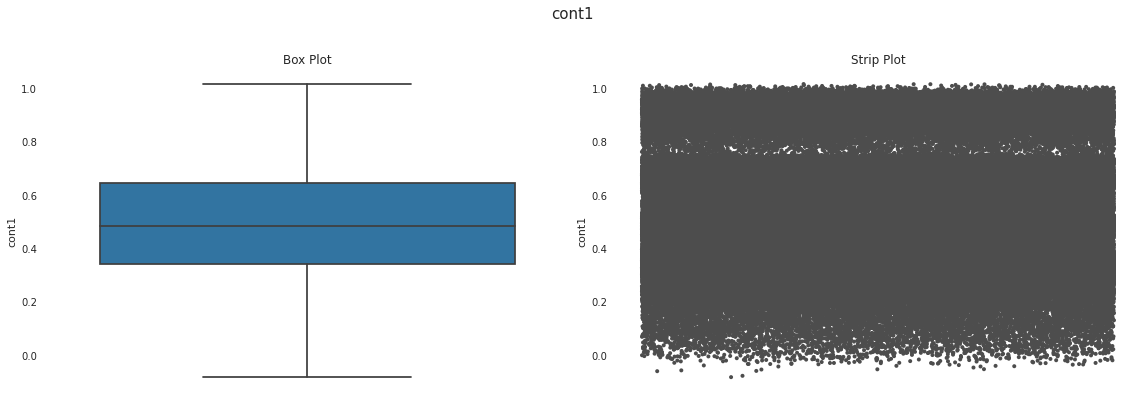

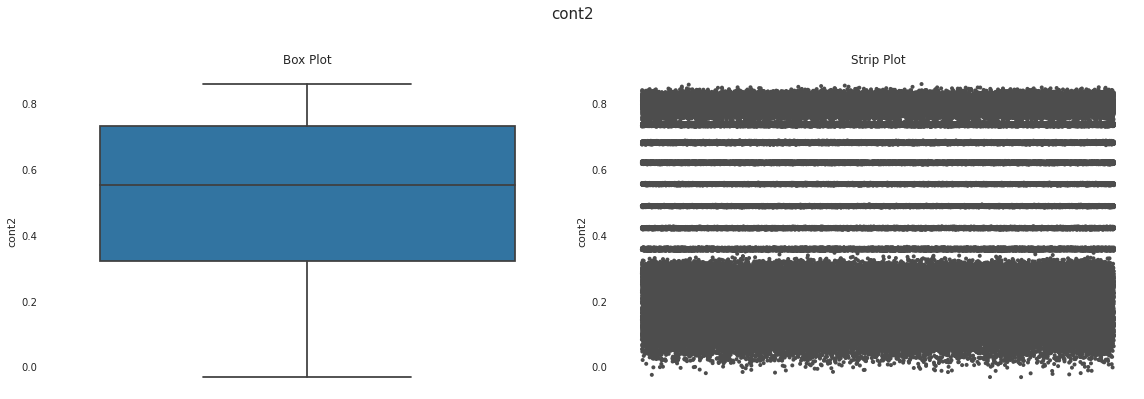

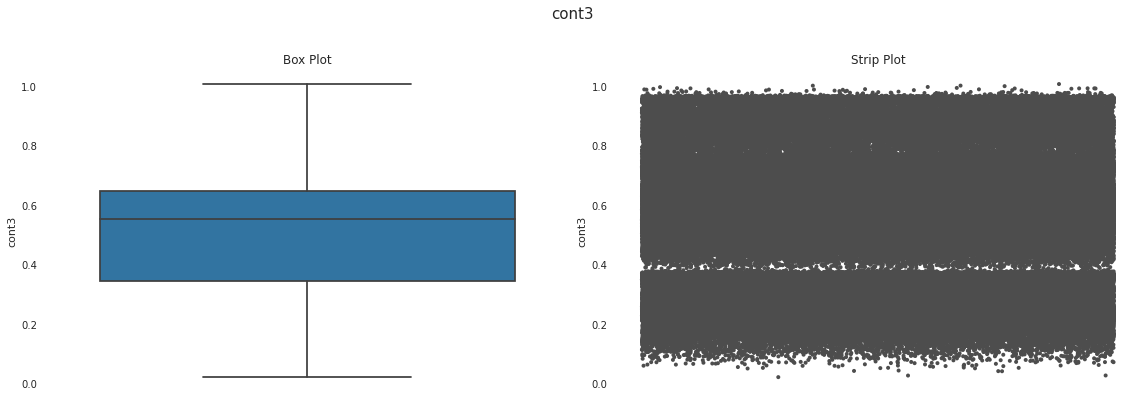

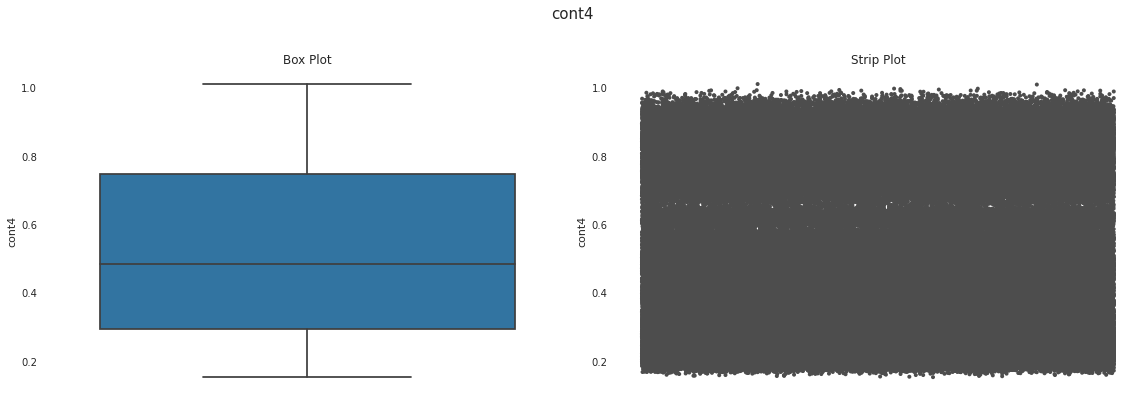

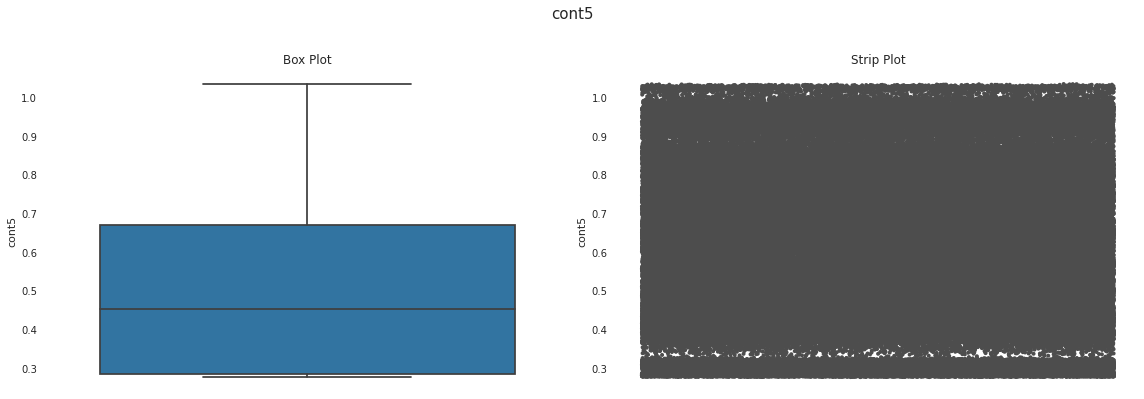

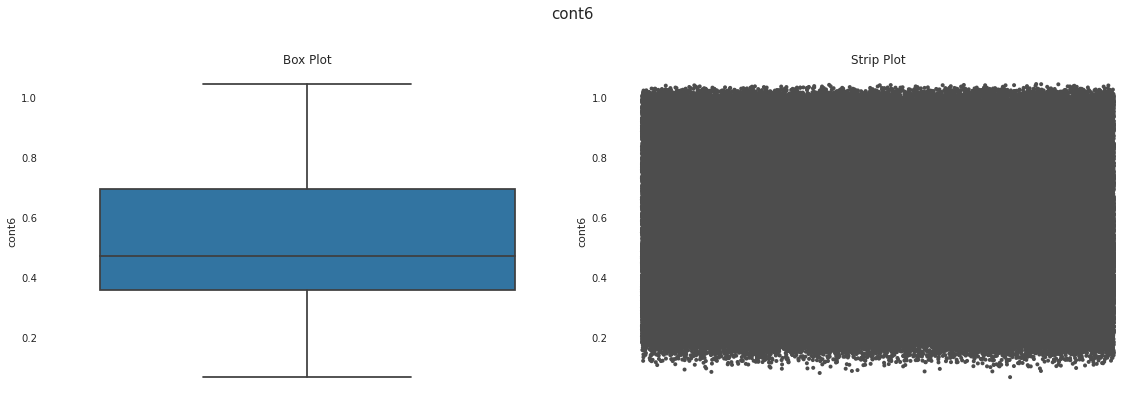

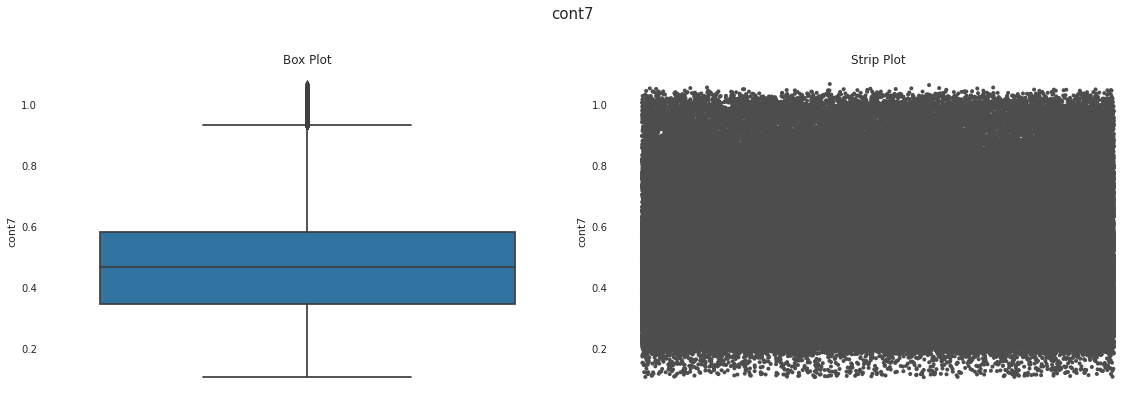

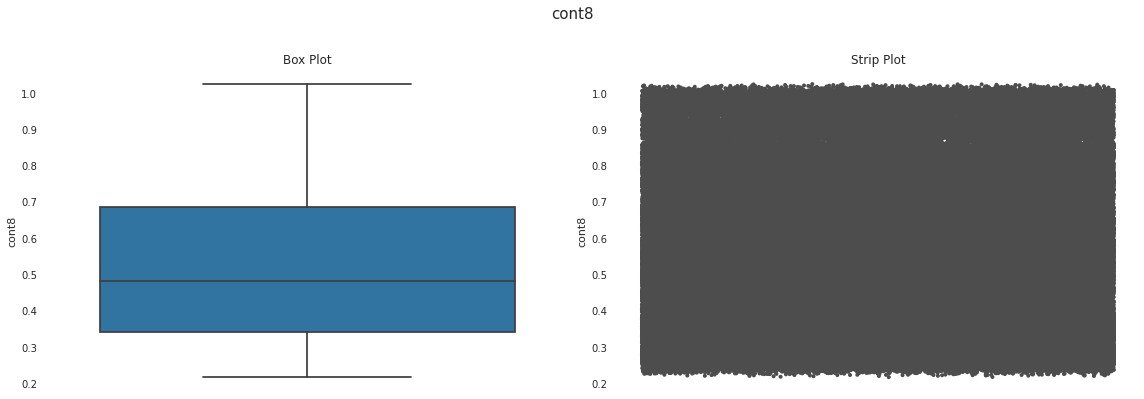

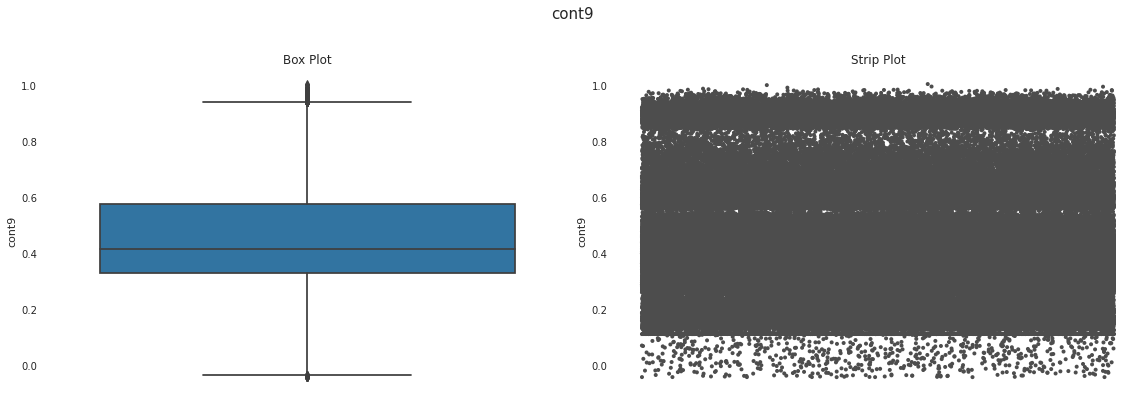

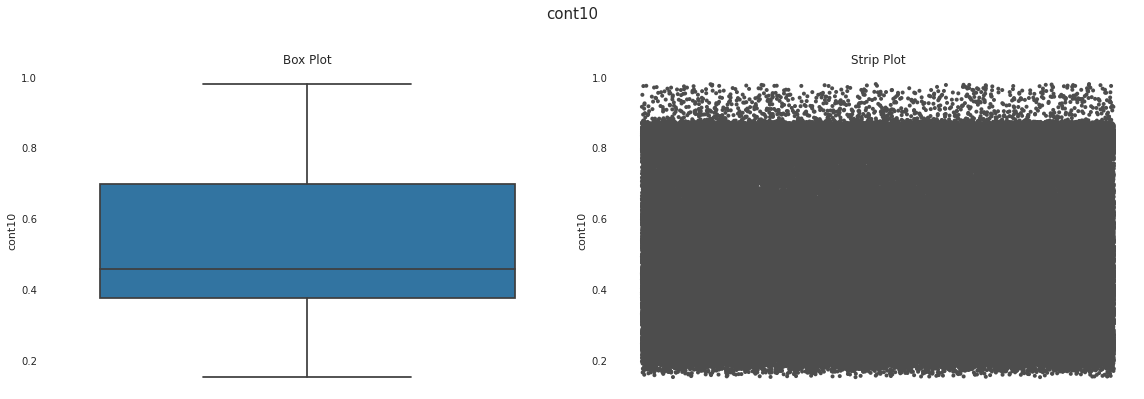

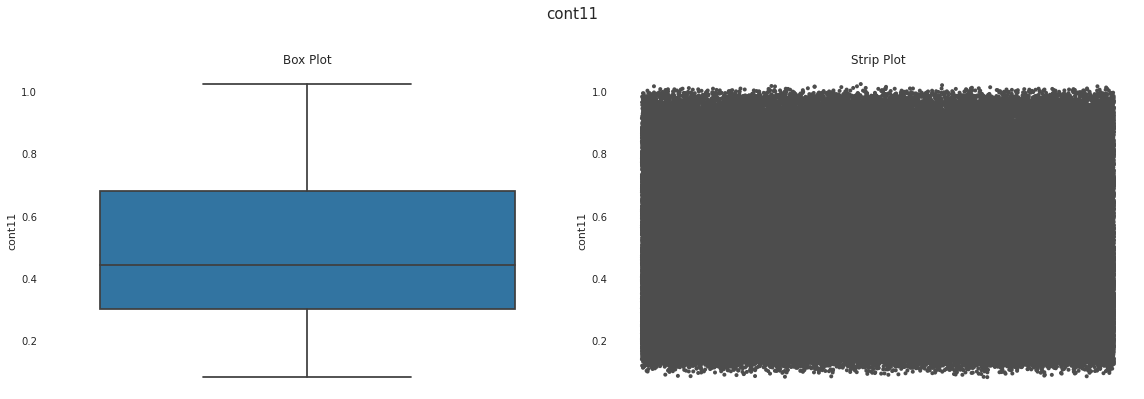

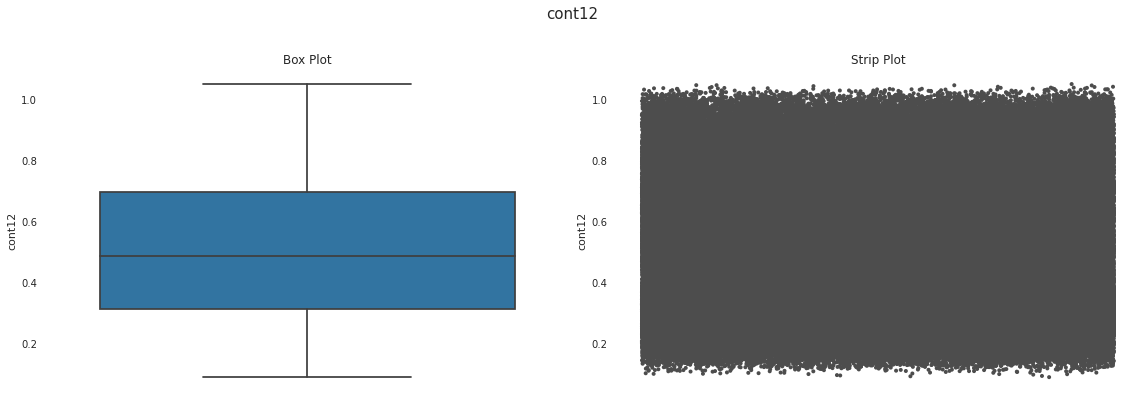

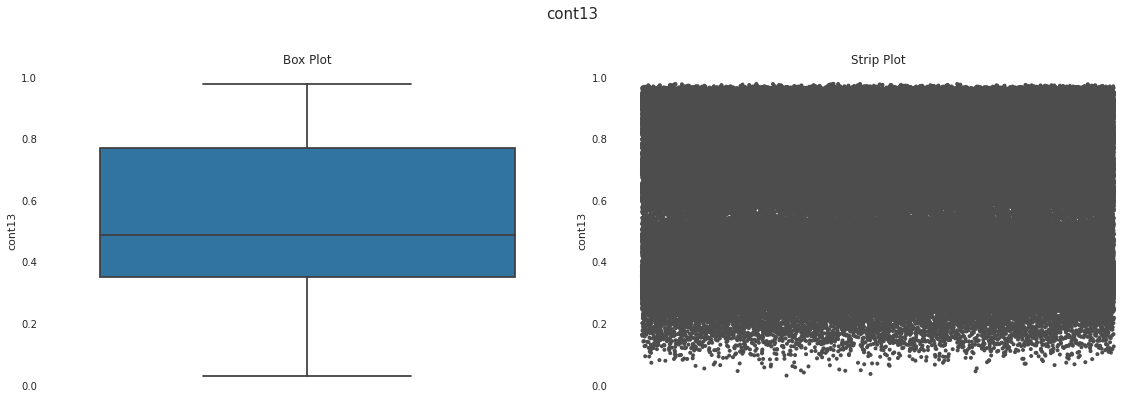

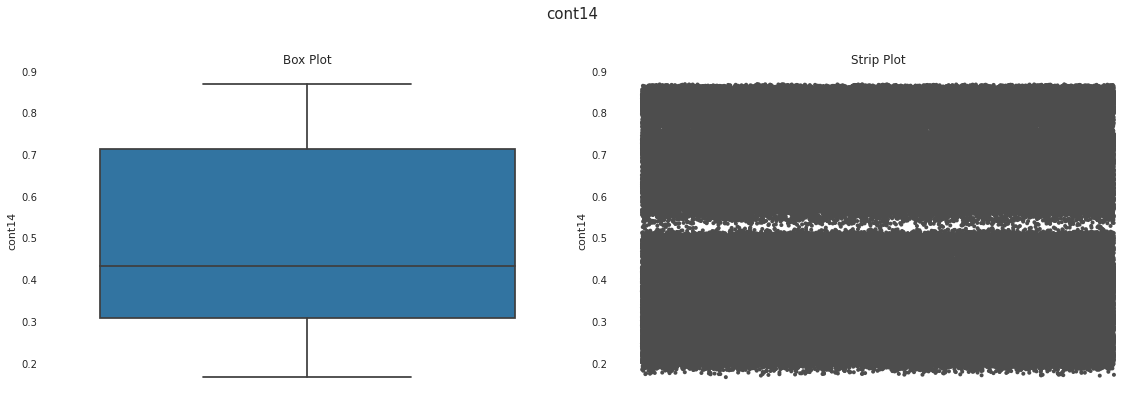

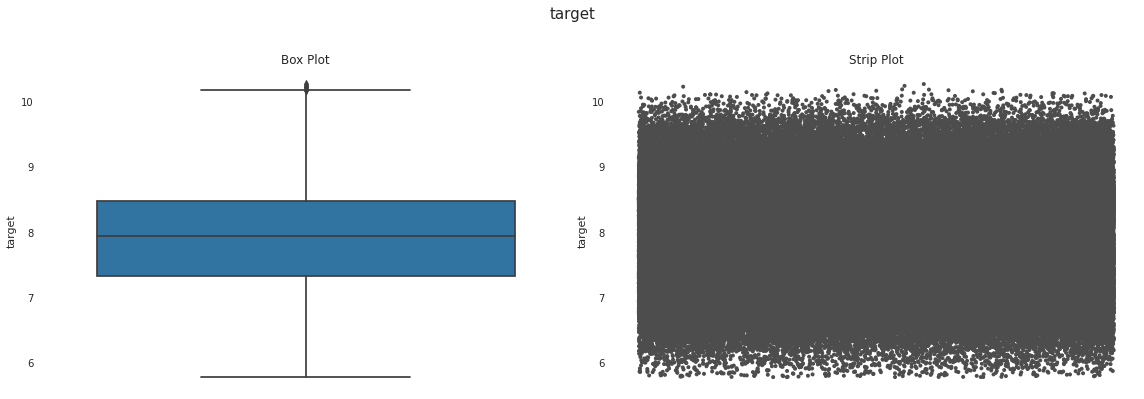

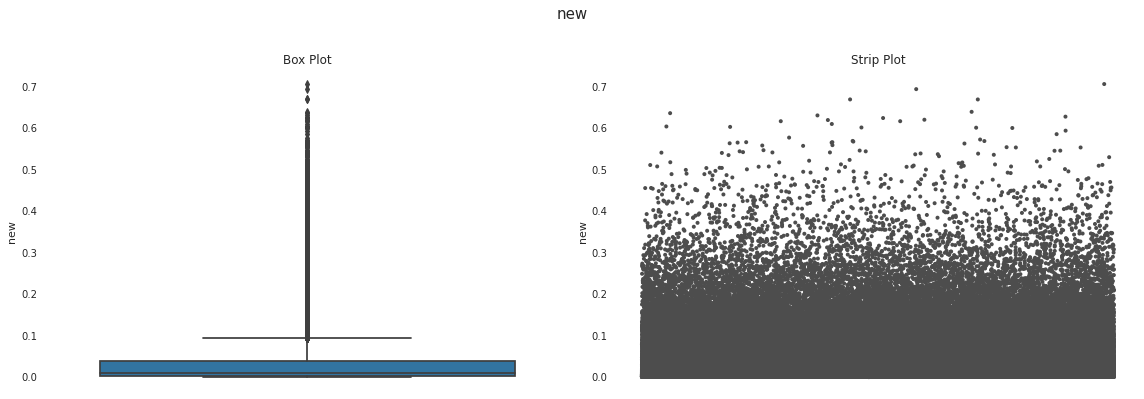

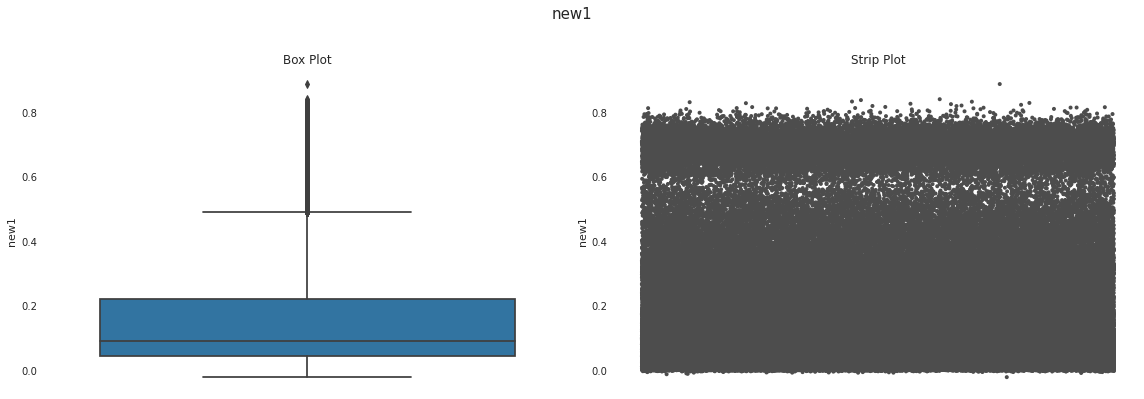

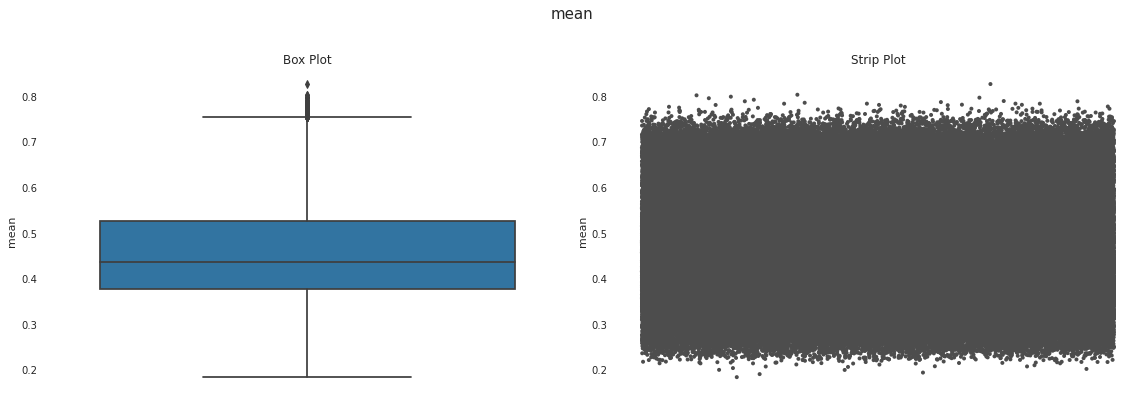

In [19]:
    for c in train_cont.columns:
        fig, axs = plt.subplots(1, 2, figsize=(16, 5))
        sns.boxplot(y=c, data=train_cont, ax=axs[0]) # 1
        sns.stripplot(y=c, data=train_cont, size=4, color=".3", linewidth=0, ax=axs[1]) # 2


        fig.suptitle(c, fontsize=15, y=1.1)
        axs[0].set_title('Box Plot')
        axs[1].set_title('Strip Plot')

        plt.tight_layout()
        plt.show()

**Percentage of data removed**

In [20]:
str(round(((org_len - len(train_cont))/org_len)*100,2))+'%'

'0.5%'

# Modelling 

**We'll be using XGBRegressor**

In [21]:
X_train = train_cont.drop('target',axis=1)
y_train = train_cont['target']

# Tuning

In [22]:
import optuna
from sklearn.model_selection  import KFold
from sklearn.metrics import mean_squared_error
import xgboost as xgb

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 350, 1000),
        'max_depth': trial.suggest_int('max_depth', 6, 13),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.009, 0.10),
        'subsample': trial.suggest_uniform('subsample', 0.50, 1),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.50, 1),
        'gamma': trial.suggest_int('gamma', 0, 0.05),
        'objective':'reg:squarederror',
        'eval_metric' : 'rmse',
        'tree_method':'gpu_hist',
       }
        
    clf = xgb.XGBRegressor(**params)
    rmse_scores = []
    X_train_k = X_train.values
    y_train_k = y_train.values
    skf = KFold(n_splits=3,shuffle=True)
    for train_idx, valid_idx in skf.split(X_train_k,y_train_k):
        train_data = X_train_k[train_idx, :], y_train_k[train_idx]
        valid_data = X_train_k[valid_idx, :], y_train_k[valid_idx]
        
        clf.fit(X_train_k[train_idx, :], y_train_k[train_idx])
        pred = clf.predict(X_train_k[valid_idx, :])
        rmse = np.sqrt(mean_squared_error(y_train_k[valid_idx],pred))
        rmse_scores.append(rmse)
    print(f'Trial done: Accuracy values on folds: {rmse_scores}')
    return np.average(rmse_scores)

In [23]:
#  Just for lesser time I've used less trials,Please do increase the trials 
n_trials = 5

FIT_XGB = True

if FIT_XGB:
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=n_trials)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2021-01-03 16:35:03,457] A new study created in memory with name: no-name-9e4bcdef-fa7d-4d73-bef3-2bbcc03dce1f
[I 2021-01-03 16:36:31,400] Trial 0 finished with value: 0.7015168458307084 and parameters: {'n_estimators': 942, 'max_depth': 9, 'learning_rate': 0.05508100076239131, 'subsample': 0.8142678708328792, 'colsample_bytree': 0.7683109554116196, 'gamma': 0}. Best is trial 0 with value: 0.7015168458307084.


Trial done: Accuracy values on folds: [0.702432224127783, 0.7037354646580204, 0.698382848706322]


[I 2021-01-03 16:39:43,369] Trial 1 finished with value: 0.7041848233435002 and parameters: {'n_estimators': 429, 'max_depth': 13, 'learning_rate': 0.042376263341470564, 'subsample': 0.5027740903456028, 'colsample_bytree': 0.720604487280227, 'gamma': 0}. Best is trial 0 with value: 0.7015168458307084.


Trial done: Accuracy values on folds: [0.7030941794803238, 0.703266311123887, 0.7061939794262897]


[I 2021-01-03 16:41:11,163] Trial 2 finished with value: 0.6978055136800442 and parameters: {'n_estimators': 977, 'max_depth': 9, 'learning_rate': 0.03208023382789353, 'subsample': 0.6407386537407934, 'colsample_bytree': 0.9997038507873275, 'gamma': 0}. Best is trial 2 with value: 0.6978055136800442.


Trial done: Accuracy values on folds: [0.6969668067118002, 0.699908209502292, 0.6965415248260401]


[I 2021-01-03 16:41:29,044] Trial 3 finished with value: 0.7012883602131761 and parameters: {'n_estimators': 493, 'max_depth': 7, 'learning_rate': 0.09731893782595098, 'subsample': 0.541020905340498, 'colsample_bytree': 0.7755306988020529, 'gamma': 0}. Best is trial 2 with value: 0.6978055136800442.


Trial done: Accuracy values on folds: [0.7012596660017189, 0.7012197907535784, 0.7013856238842312]


[I 2021-01-03 16:41:54,073] Trial 4 finished with value: 0.6957391351219476 and parameters: {'n_estimators': 976, 'max_depth': 6, 'learning_rate': 0.04569021083258047, 'subsample': 0.8652764894560779, 'colsample_bytree': 0.5089515101891947, 'gamma': 0}. Best is trial 4 with value: 0.6957391351219476.


Trial done: Accuracy values on folds: [0.6959811913712355, 0.6952633624817196, 0.695972851512888]
Number of finished trials: 5
Best trial:
  Value: 0.6957391351219476
  Params: 
    n_estimators: 976
    max_depth: 6
    learning_rate: 0.04569021083258047
    subsample: 0.8652764894560779
    colsample_bytree: 0.5089515101891947
    gamma: 0


In [24]:
optuna.visualization.plot_slice(study)

## Fitting

In [25]:
#best_param = study.best_params
best_param = {'n_estimators': 751, 'max_depth': 10, 
              'learning_rate': 0.019789645280696613, 
              'subsample': 0.8730019407814834, 
              'colsample_bytree': 0.6012295369579667,'gamma':0}
best_param['objective'] ='reg:squarederror'
best_param['tree_method'] ='gpu_hist'
best_param['eval_metric'] ='rmse'

In [26]:
model = xgb.XGBRegressor(**best_param)
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6012295369579667,
             eval_metric='rmse', gamma=0, gpu_id=0, importance_type='gain',
             interaction_constraints='', learning_rate=0.019789645280696613,
             max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
             n_estimators=751, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.8730019407814834, tree_method='gpu_hist',
             validate_parameters=1, verbosity=None)

### Model Importance 

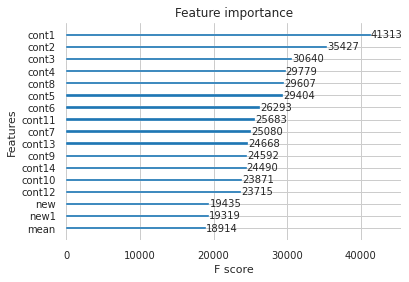

In [27]:
xgb.plot_importance(model)

# Submission

In [28]:
predictions_final = model.predict(test.drop('id',axis=1))

In [29]:
submission = pd.DataFrame({
        "id": test["id"],
        "target":predictions_final
    })
submission.to_csv('my_submission.csv', index=False)

# If you liked it. Please do upvote ✌✔😺